In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
def plot_predictions(x, y_true, predictions, errors, title):
    fig, ax = plt.subplots()

    horizon = len(predictions.columns) + 5
    ax.plot(x[-horizon:], y_true[-horizon:], label='ground truth')
    
    x_pred = x[-len(predictions.columns):]
    for modelname in predictions.index:
        ax.plot(x_pred, predictions.loc[modelname].to_list(), label=f'{modelname} (MASE: {errors.loc[modelname, "MASE"]:.2f})')
    ax.legend()
    ax.tick_params(axis='x', labelrotation = 90)    
    ax.set_title(title)
    #fig.savefig(f'results/plots/{args.dataset}_{args.seriesname}.png')

In [35]:
def plot_results(dataset, title):
    data = pd.read_csv(f'data/clean/{dataset}.csv').set_index('date')
    x = pd.to_datetime(data.index, format='%Y-%m-%d')
    y_true = data['T1'].values
    predictions = pd.read_csv(f'results/predictions/{dataset}_T1.csv', index_col=0)
    errors = pd.read_csv(f'results/errors/{dataset}_T1.csv', index_col=0)

    plot_predictions(x, y_true, predictions, errors, title)

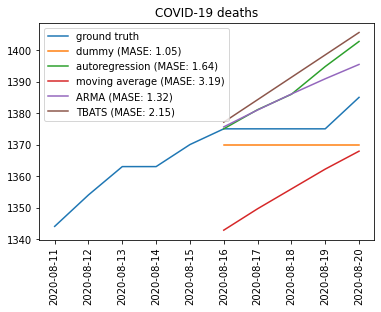

In [36]:
plot_results('covid_deaths_dataset', 'COVID-19 deaths')

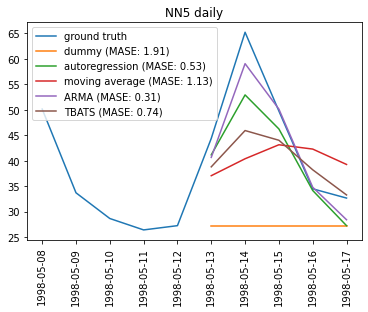

In [37]:
plot_results('nn5_daily_dataset_without_missing_values', 'NN5 daily')